<div align="center">
    <h1>Amiya Das (22ce01057)</h1>
    <h3>Assignment-1</h3>
</div>   

<h3>Question-4</h3>

4.) Write a Julia code for the solution of the beam problem shown in Fig. 1. Plot the bending moment diagram (BMD) and shear force diagram (SFD). Your code should be generic enough to take any value for the input variables l and q.

![My chart](A1_CADlabCourse_page1_image.png)

In [14]:
using Plots
using CalculusWithJulia
using LaTeXStrings
using Symbolics

In [23]:
# --- Input variables ---

# Define the total length of the beam (l) and the uniform load (q).
l = 10   # Length of the main span in meters
q = 2    # Uniform distributed load in N/m

# Create an array of x-values for the plot.
x_values = range(0, stop=1.25*l, length=100);

# Spport reactions
R_B = (1.25-(1.25^2)/2) * q * l
R_A = 1.25 * q * l - R_B;

In [24]:
function shear_force(x, q, R_A, R_B)
    if x <= l
        # Section from left support to right support (0 <= x <= l)
        return R_A - q * x
    else
        # Section on the overhang (l < x <= 1.25l)
        # The shear force here is the reaction at B plus the load on the overhang.
        return R_A + R_B - q * x
    end
end

V_values = [shear_force(x, q, R_A, R_B) for x in x_values];

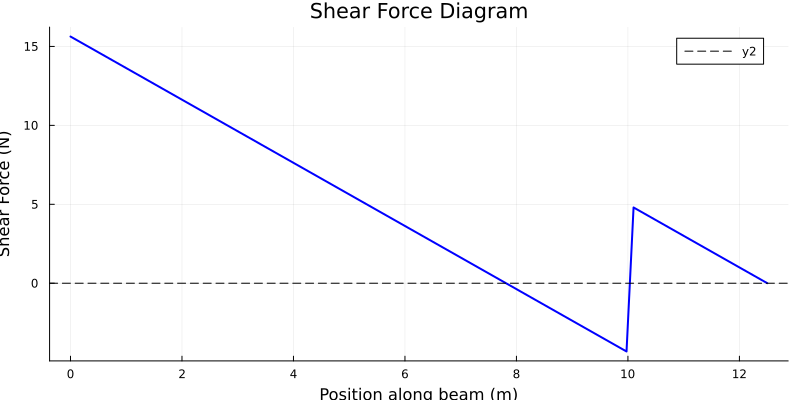

In [34]:
# Plot the Shear Force Diagram (SFD).
sfd_plot = plot(x_values, V_values,
    title="Shear Force Diagram",
    xlabel="Position along beam (m)",
    ylabel="Shear Force (N)",
    label="",
    lw=2,
    linecolor=:blue,
    grid=true,
    size=(800, 400))
hline!([0], lw=1, linecolor=:black, linestyle=:dash)

# Display the plots.
plot(sfd_plot)
savefig(sfd_plot, "SFD.png")
display(sfd_plot)

In [26]:
function bending_moment(x, q, R_A, R_B)
    if x <= l
        # Section from left support to right support (0 <= x <= l)
        # Bending moment is R_A*x minus the moment from the distributed load.
        return R_A * x - (q * x * x) / 2
    else
        # Section on the overhang (l < x <= 1.25l)
        # We can calculate the bending moment from the right end, which should be 0.
        # Let x' be the distance from the right end (x' = 1.25l - x).
        # M = -q * x'^2 / 2
        x_prime = (1.25 * l) - x
        return - (q * x_prime * x_prime) / 2
    end
end

M_values = [bending_moment(x, q, R_A, R_B) for x in x_values];

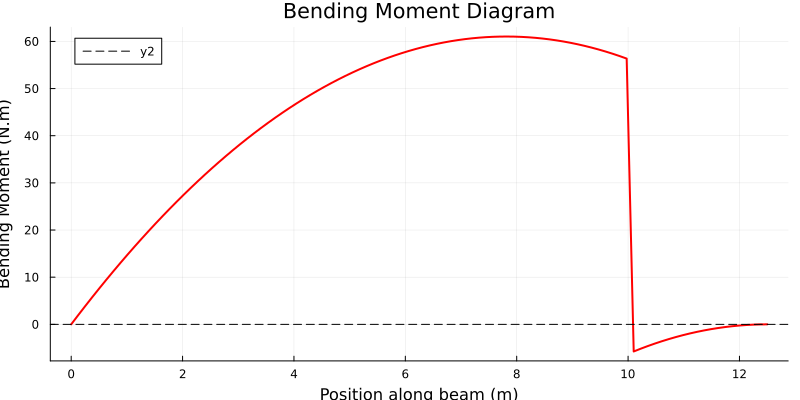

In [32]:
# Plot the Bending Moment Diagram (BMD).
bmd_plot = plot(x_values, M_values,
    title="Bending Moment Diagram",
    xlabel="Position along beam (m)",
    ylabel="Bending Moment (N.m)",
    label="",
    lw=2,
    linecolor=:red,
    grid=true,
    size=(800, 400))
hline!([0], lw=1, linecolor=:black, linestyle=:dash)

# Display the plots.
plot(bmd_plot)
savefig(bmd_plot, "BMD.png")
display(bmd_plot)